[1. Introduction](#1)

[2. Why Logistic Regression ?](#2)

* [2.1 Sigmoid Function](#2.1)

[3. Importing Libraries](#3)

[4. Importing Training and Test Dataset](#4)

[5. Dataset Column Details](#5)

[6. Explanatory Data Analysis - Training Data](#6)

* [6.1 Number of Rows and Column](#6.1)

* [6.2 Missing Data Analysis](#6.2)

* [6.3 Heat Map](#6.3)

* [6.4 Verifing Unique Values ](#6.4)

* [6.5 Visual Representation of Target based on features](#6.5)

* [6.6 Statistical Analysis of Target based on features](#6.6)

* [ 6.7 Visual Representation of features ](#6.7)

[7. Data Preprocessing](#7)

* [7.1 Handling missing data of age](#7.1)

* [7.2 Handling missing data of Cabin](#7.2)

* [7.3 Handling missing data of Embarked](#7.3)

[8. Encoding Categorical Features](#8)

[9. Analysis Numerical columns](#9)

[10. Train and Test Split](#10)

[11. Xgboost model](#11)

[12. Feature Scaling](#12)

[13. gridsearch cv ](#13)

[14. light gb model](#14)

[15. Test.csv Analysis](#15)

* [15.1 Missing Value Analysis of Test.csv](#15.1)

* [15.2  Heat Map for missing value of Test.csv](#15.2)

[16. Data Preprocessing for Test.csv](#16)

* [16.1 Handling Missing Data of Age](#16.1)

* [16.2 Handling Missing Data of Cabin](#16.2)

* [16.3 Handling Missing Data of Fare](#16.3)

[17. Dropping Insignificant Features](#17)

[18. Encoding Categorical Features of Test.csv](#18)


[19. Building test data model](#19)






<a id="1"></a> <br>
# 1. Intoduction

On April 15, 1912, during the maiden voyage of Titanic, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

Logistic Regression Machine Learning algorithm is modeled, to a predictive the answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).
 

<a id="2"></a> <br>
# 2. Why Logistic Regression ?

For the "Titanic - Machine Learning from Disaster" data set we have to build a model, which would predict the person who traveled is survived or not and the result belongs to two discrete categories. A logistic approach fits best when the task that the machine is learning is to predict two discrete classes like Yes/No, True/False, Sucess/Failure, etc.

Logistic regression is a statistical analysis method used to predict the target variables which belong to discrete categories. It is the most commonly used machine learning algorithm when it comes to binary classification.

It predicts the probability of occurrence of an event using a logistic function also known as the sigmoid function and maps its outcome into two classes 0 or 1.

<a id="2.1"></a> <br>
# 2.1.Sigmoid Function

The sigmoid function, also called logistic function is an ‘S’ shaped curve and it takes any value as input but will have only two values as output, i.e., 0 and 1. It can be represented by equation


  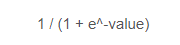

Where e is known as Euler's number and its value is approximately 2.71828.

The S cure of logistic function looks like below

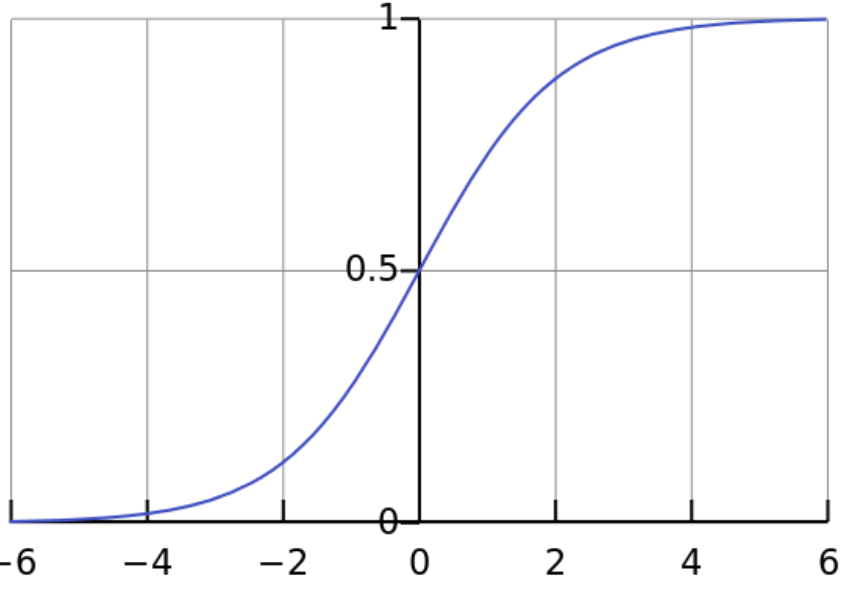


From the curve, it is clear that when X tends to positive or negative infinity, the Y takes 1 and 0 simultaneously. 

The output of the sigmoid function is mapped to 1 or 0 based on threshold value 0.5 (Threshold value is 0.5 by default)

* If value of Probability of occurence of the event > 0.5, sigmoid function output will be 1
* If value of Probability of occurence of the event < 0.5, sigmoid function output will be 0 

<a id="3"></a> <br>
# 3. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
#libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.express as px
%matplotlib inline

# Library for feature Scaling
from sklearn.preprocessing import StandardScaler, LabelEncoder

#Libraries for logistic Regression Model Building
from sklearn.model_selection import train_test_split,GridSearchCV


#Library for evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb
import lightgbm as lgb
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

<a id="4"></a> <br>
# 4. Importing Training and Test Dataset

As per [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic) dataset there two seperate csv files for training and test data.

training data set is imported to train_data and test data is imported to test_data

In [2]:
train_data = pd.read_csv("C:\\Users\\hp\\Desktop\\assignments\\Logistic Regression\\Titanic_train.csv")
Test_data = pd.read_csv("C:\\Users\hp\\Desktop\\assignments\\Logistic Regression\\Titanic_test.csv")

<a id="5"></a> <br>
# 5. Dataset Column Details

In [3]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
Test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
Test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Dataset details are below :  

* PassengerId - Indicates the passenger number
* Survived - Indicates if the passenger travelled is survived or not. 
* Pclass - Indicates which class passenger belows
* Name - Provides Names details of passenger
* Sex - Indicates sex/gender of passenger
* Age - Indicates age of passenger
* SibSp - Provides information about number of sibiling/spouse accompaning 
* Parch  - Provides information about number of parents / children aboard the Titanic
* Ticket - Ticket number
* Fare - Passenger fare
* Cabin - Provides information about Cabin number, NaN specifies no cabin allocated
* Embarked - Port of Embarkation




<div class="alert alert-block alert-info"> However, we can see there is no Survived column in the test data. Evaluation can only be done when we can compare our predicted target with the actual target.

So to perform evaluation, I will be splitting training data provided into training and test data. Once it is done, the original training data provided will be used to predict test data output.</div>

<a id="6"></a> <br>
# 6. Explanatory Data Analysis - Training Data

<a id="6.1"></a> <br>
### 6.1 Number of Rows and Column

In [7]:
train_data.shape

(891, 12)

No: of rows of training dataset = 891

No:of columns of training dataset = 12

<a id="6.2"></a> <br>
### 6.2 Missing Data Analysis

In [8]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Those column which have  0 against them,  indicates that there are no null values.

Here there are null values are for Age, Cabin and Embarked.

Number of null values for:
* Age - 177
* Cabin - 687
* Embarked - 2       

<a id="6.3"></a> <br>
### 6.3 Heat Map

* Heat Map To check correlation between numerical features

In [9]:
train_data_num_col = train_data.select_dtypes(exclude=['object']).columns
train_data_num = train_data[train_data_num_col]

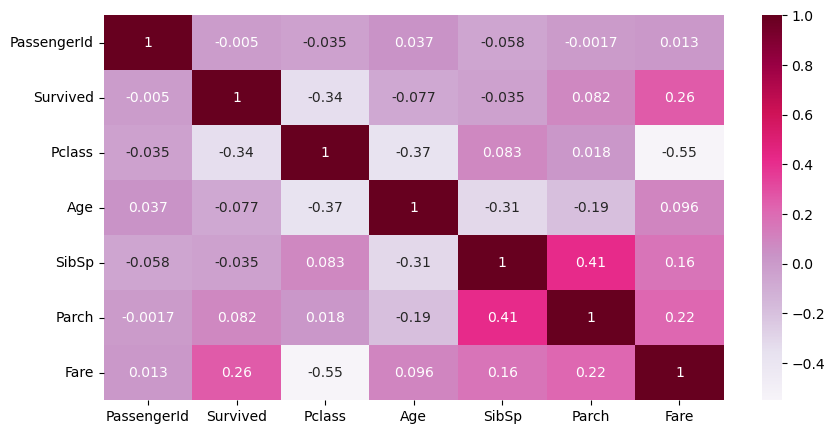

In [10]:
plt.figure(figsize=(10, 5))
sns.heatmap(train_data_num.corr(), annot=True, cmap='PuRd');

In [11]:
correlation = abs(pd.DataFrame(train_data_num.corr().Survived))
correlation

,Survived
PassengerId,0.005007
Survived,1.000000
Pclass,0.338481
Age,0.077221
SibSp,0.035322
Parch,0.081629
Fare,0.257307


* Heat Map To Highlight Missing Value

<Axes: >

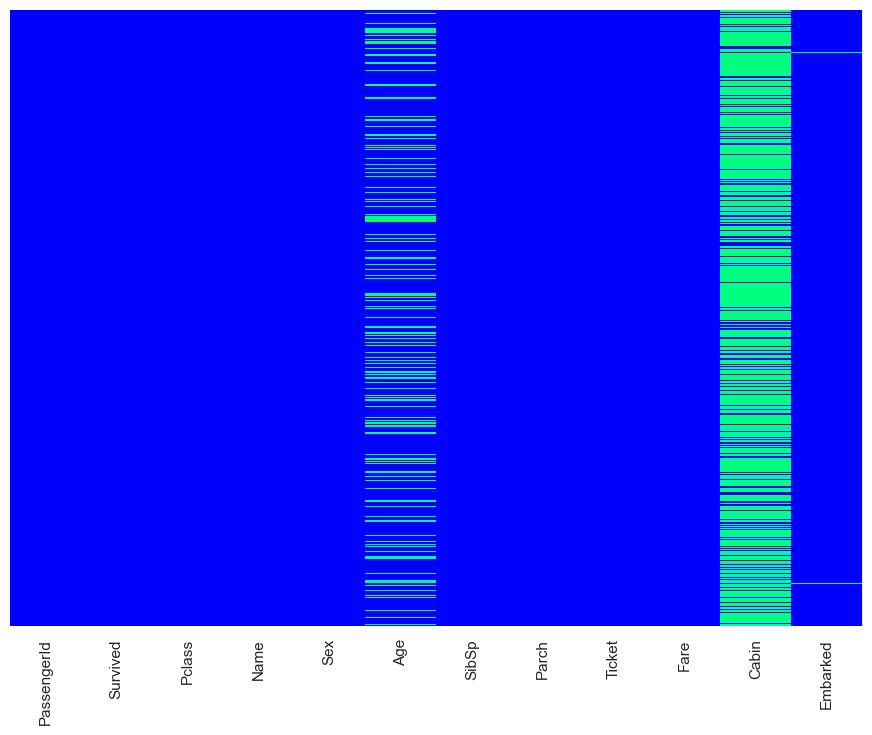

In [12]:
sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap="winter")

The train_data.isnull() will provide a tabular output with boolean False or True. Where False will indicate the value is not missing and True will indicates a missing value. By using seaborn we can create the above heat map where the white line indicates a missing value in the column or we can say it stands for every True value.

From the heat map visualization, it is very evident that only a small proportion of rows have Cabin value. Age is also significantly missing and there are two lines for Embarked.


<a id="6.4"></a> <br>
### 6.4 Verifing Unique Values

As per data dictionary of dataset following column have unique discrete values
1. survival - 0 = No, 1 = Yes
1. pclass - 1 = 1st, 2 = 2nd, 3 = 3rd
1. embarked - C = Cherbourg, Q = Queenstown, S = Southampton

* Verifying unique value of survival

In [13]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

* Verifying unique value of Pclass

In [14]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

* Verifying unique value of Embarked

In [15]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

There is no mismatch in the unique value provided in the dataset. The number aganist each unique value represents number of records belonging to that particular category.

<a id="6.5"></a> <br>
### 6.5 Visual Representation of Target based on features

* Survival Vs Demise

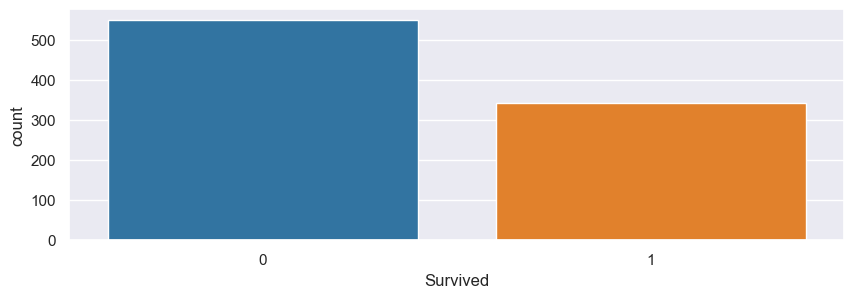

In [16]:
plt.figure(figsize=(10, 3))
sns.countplot(x = "Survived",data=train_data, palette="tab10")
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1645C5;
           font-size:110%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
From the above visual plot of training set, it is clear that number of person survived is less than number of person demise.</p>
</div>

* Survival based on sex

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1000x300 with 0 Axes>

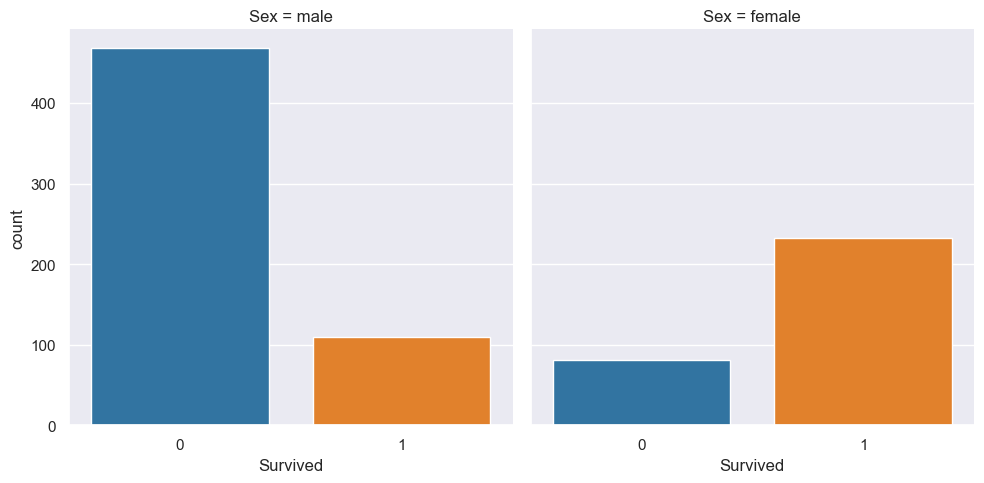

In [17]:
plt.figure(figsize=(10, 3))
sns.catplot(x='Survived', col='Sex', kind='count', data=train_data,palette="tab10");
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#006989;
           font-size:110%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Above visual states, most people who didnot survive are much more likely to be male and people who survived are much likely to be female.</p>
</div>


* Survival based on Pclass - Passenger Class

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1000x300 with 0 Axes>

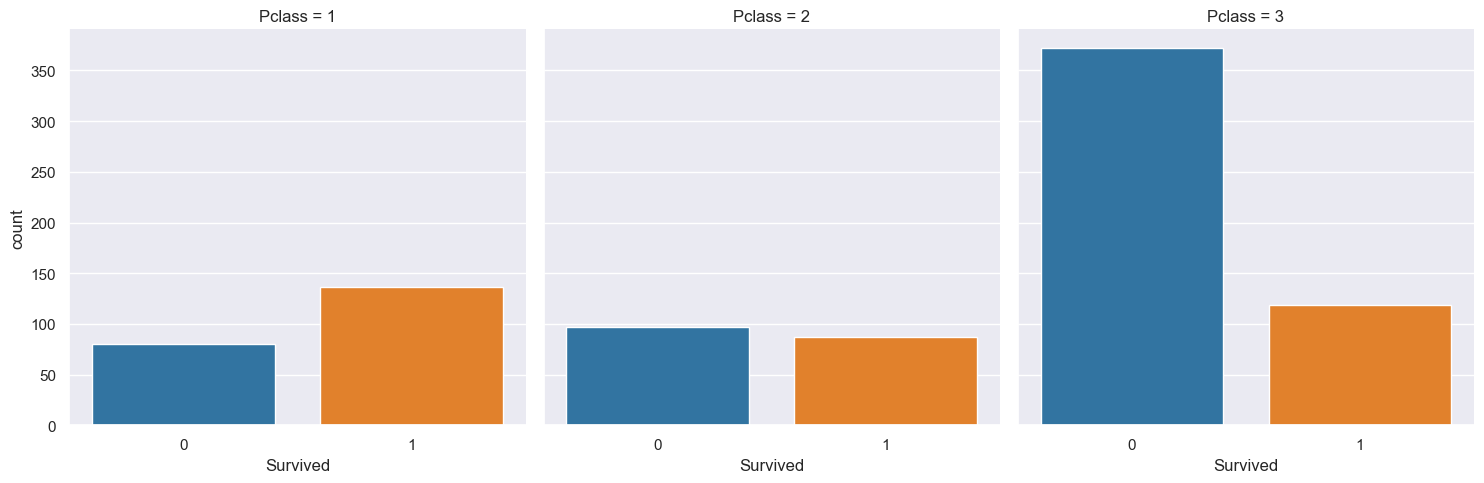

In [18]:
plt.figure(figsize=(10, 3))
sns.catplot(x='Survived', col='Pclass', kind='count', data=train_data,palette="tab10");
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#006989;
           font-size:110%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Above plot indicates. people not survived belong to passenger class 3 or cheapest ticket class.</p>
</div>

* Survival based on Pclass and Sex

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1000x300 with 0 Axes>

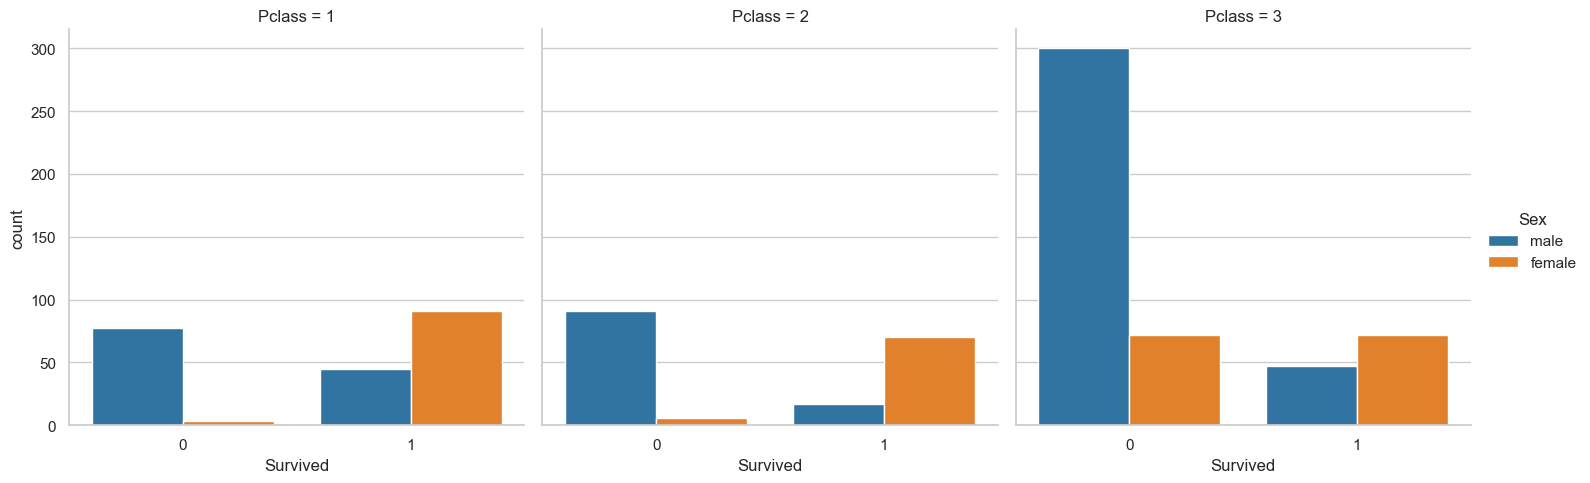

In [19]:
plt.figure(figsize=(10, 3))
sns.set_style('whitegrid')
sns.catplot(x='Survived', col='Pclass', hue = 'Sex', kind='count', data=train_data,palette="tab10");
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#006989;
           font-size:110%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Above plot gives a deeper picture of people not survived. 
    
PClass 3 - The Majority of male and half of female crowd could not make up to survive.
    
PClass 2 and 1 - Almost all who did not survive are male.
    
    </p>
</div>

* Survival based on Embarked 

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1000x300 with 0 Axes>

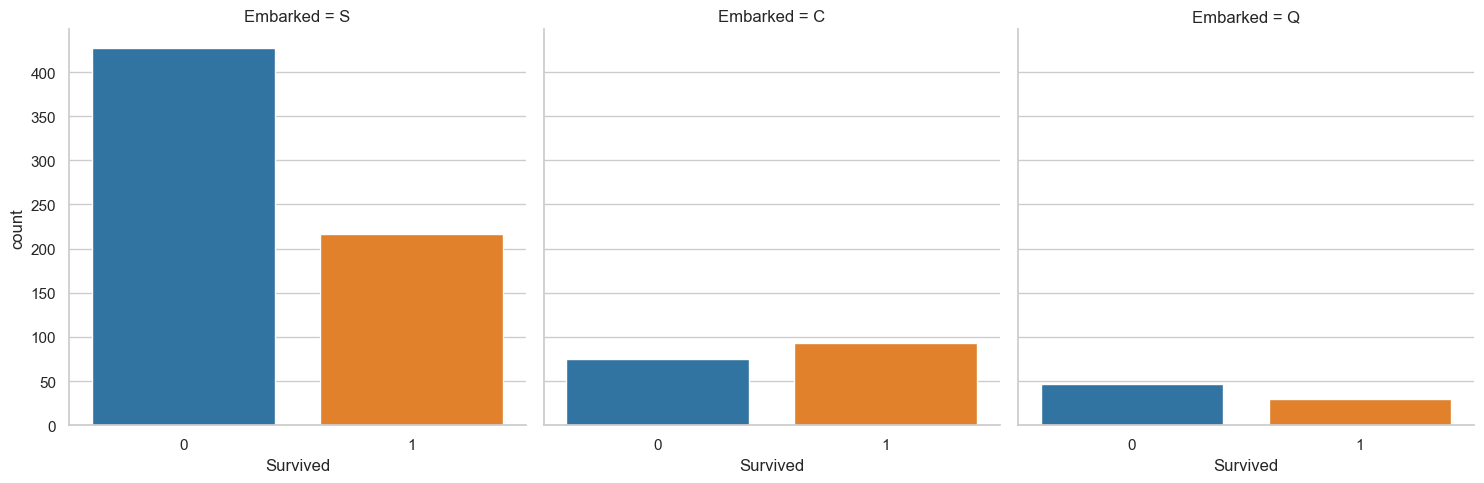

In [20]:
plt.figure(figsize=(10, 3))
sns.set_style('whitegrid')
sns.catplot(x='Survived', col='Embarked', kind='count', data=train_data,palette="tab10");
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#006989;
           font-size:110%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Majority of people boarded from Southampton port could not survive. Already we have seen people in 3rd Class could not survive. So we have check relation between Pclass and Embarked

    </p>
</div>

* Survival based on Embarked and Pclass

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1000x300 with 0 Axes>

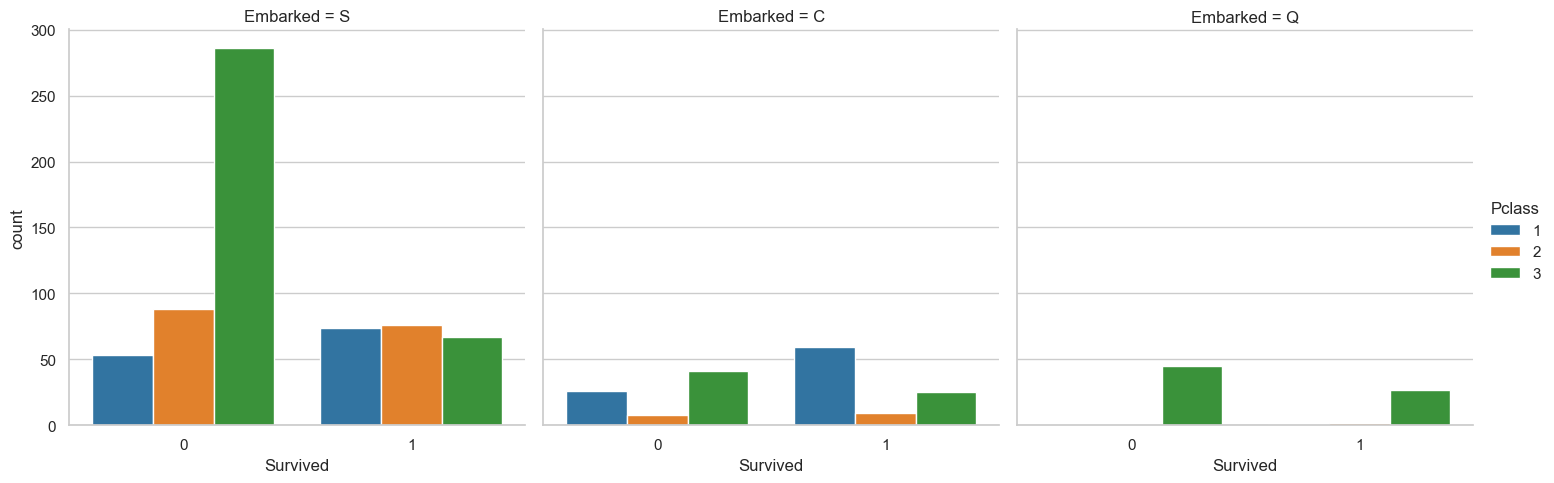

In [21]:
plt.figure(figsize=(10, 3))
sns.set_style('whitegrid')
sns.catplot(x='Survived', col='Embarked', hue = 'Pclass', kind='count', data=train_data,palette="tab10");
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#006989;
           font-size:110%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Embarked S - Majority of people died belong to PClass  3.
Embarked C - Here Pclass 2 has less death compared to other 2 class, still Pclass 3 has majority of death. But when compared to Embarked C infact it is much much less.
Embarked Q - Here Pclass 3 only have death rate.

    </p>
</div>

* Survival based on Fare

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



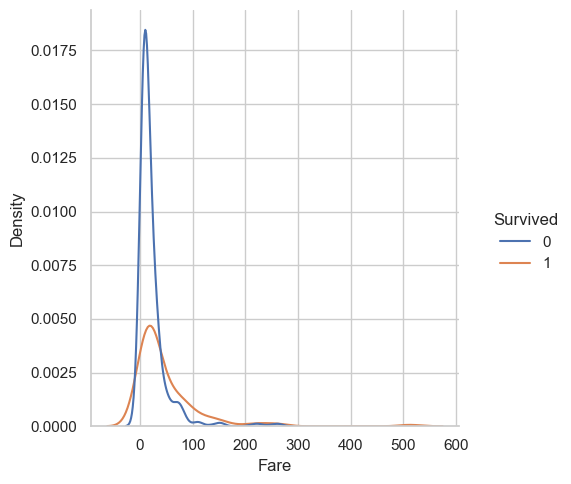

In [22]:
sns.displot(data=train_data, x="Fare",hue='Survived',kind ='kde')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#006989;
           font-size:110%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
The Maximum of people who could not survive were those who bought the ticket with low fare.
    </p>
</div>

<a id="6.6"></a> <br>
### 6.6 Statistical Analysis of Target based on features

* Survival based on Sex

In [23]:
pd.crosstab(train_data.Sex,train_data.Survived,normalize = "index" ).style.background_gradient(cmap='Set3')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#006989;
           font-size:110%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Out of total females traveled 74.2% of them could survive but  only 18.9% of total male traveled could survive.

    </p>
</div>

* Survival based on Pclass

In [24]:
pd.crosstab(train_data.Pclass,train_data.Survived,normalize = "index" ).style.background_gradient(cmap='Set2')

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#006989;
           font-size:110%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Statistical analysis of survival based on Pclass shows, 62.96% of PClass 1 could survive, and 47.28% of Pclass2 could survive and 24.24% of PClass3 could survive. 

    </p>
</div>

* Survival based on Embarked

In [25]:
pd.crosstab(train_data.Embarked,train_data.Survived,normalize = "index" ).style.background_gradient(cmap='Set1')

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#006989;
           font-size:110%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Statistical analysis of survival based on Embarked shows, 55.36% of Embarked C could survive, and 38.96% of Embarked Q could survive and 33.7% of Embarked s could survive. 

    </p>
</div>

<a id="6.7"></a> <br>
### 6.7 Visual Representation of features 

* Visual representation of age

<Axes: xlabel='Age', ylabel='Count'>

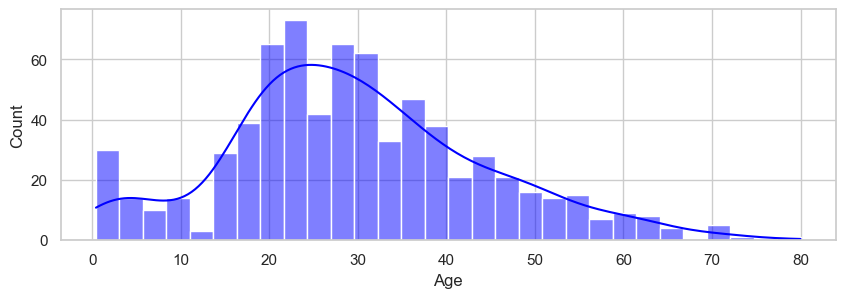

In [26]:
plt.figure(figsize=(10, 3))
sns.histplot(train_data['Age'].dropna(),kde=True,color='blue',bins=30)

Age distribution visualisation, clearly shows skew towards younger passengers. 

If more details of age group is to be seen, we can use cufflinks.

In [27]:
cf.go_offline()
train_data['Age'].iplot(kind='hist',bins=35)

From cufflinks visualisation, it is much more clear about passenger age distribution. The passgeners are more likely to belong to age group grom 18-33 and there are quite few infant passengers from 0-2. cufflinks visualisation allows to create an interactive plot, like can magnify, zoom in zoom out and much more options. 

* Visualisation of SibSp (Siblings/Spouses )

<Axes: xlabel='SibSp', ylabel='count'>

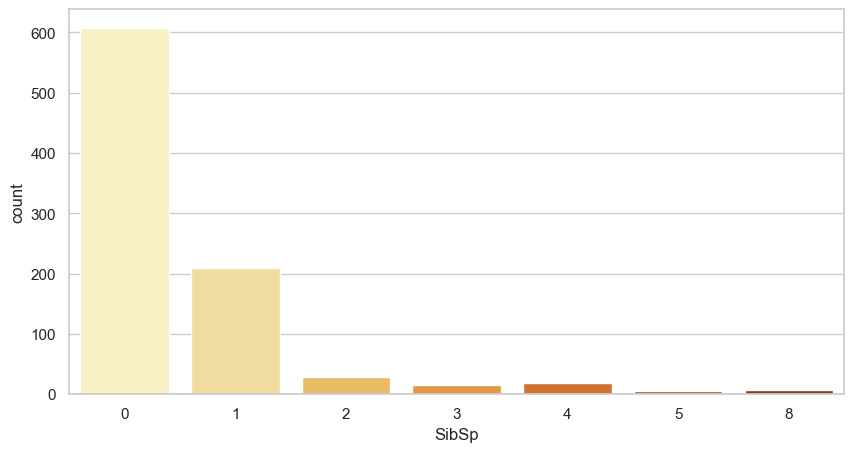

In [28]:
plt.figure(figsize=(10, 5))
sns.countplot(x='SibSp',data=train_data, palette='YlOrBr')

The above visualisation clearly states most of the people travelled didnot have sibling or spouse

* Visualisation of Parch  feature

<Axes: xlabel='Parch', ylabel='count'>

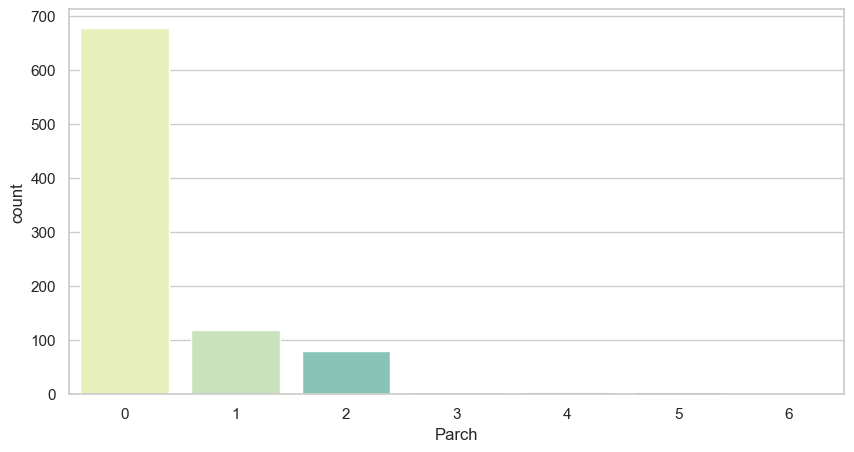

In [29]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Parch',data=train_data,palette='YlGnBu')

The above visualisation clearly states most of the people travelled didnot have children accompanying them

* Joint plot of SibSp and Parch

As Visual representation of SibSp and Parch shows there majority where single passengers, so we can use a joint map to check the distribution.

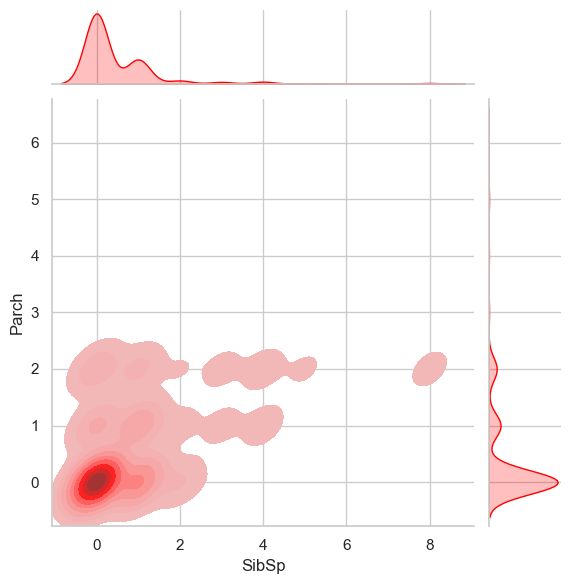

In [30]:
sns.jointplot(x='SibSp',y='Parch',data=train_data,color='red',kind='kde', fill =True);

* 3D Visualisation of a person with features Name,Sex and Age

In [31]:
plt.figure(figsize=(10, 3))
fig = px.scatter_3d(train_data, x='Name', y='Sex', z='Age', color='Age')
fig.show()

<Figure size 1000x300 with 0 Axes>

Each point, represents a person and it shows name, sex and age. Color indicator is Age.

<a id="7"></a> <br>
# 7.Data Preprocessing

As we already know we have missing data for Age, Cabin and Embarked.

Number of missing data for:
* Age - 177
* Cabin - 687
* Embarked - 2     

<a id="7.1"></a> <br>
### 7.1  Handling missing data of Age

In [32]:
train_data['Age'].isnull().sum()

177

There are  177 null values in age column.

We can use imputing function to fill missing age data, by finding dependency of age over the Pclass variable, as we have already seen 3rd class survival rate is very less. For this first we can visualise this distribution using a boxplot with age and Pclass. 

Boxplot, box indicates the interquartile Range(IQR) with median as central line.  Maximum value that is the line end at top is equal to  Q3+1.5* IQR and minimum line at bottom is equal to Q1-1.5* IQR. If there is any circle outside the extreme lines, it indicates there is outlier in the data.

Text(0.5, 1.0, 'Age over Pclass')

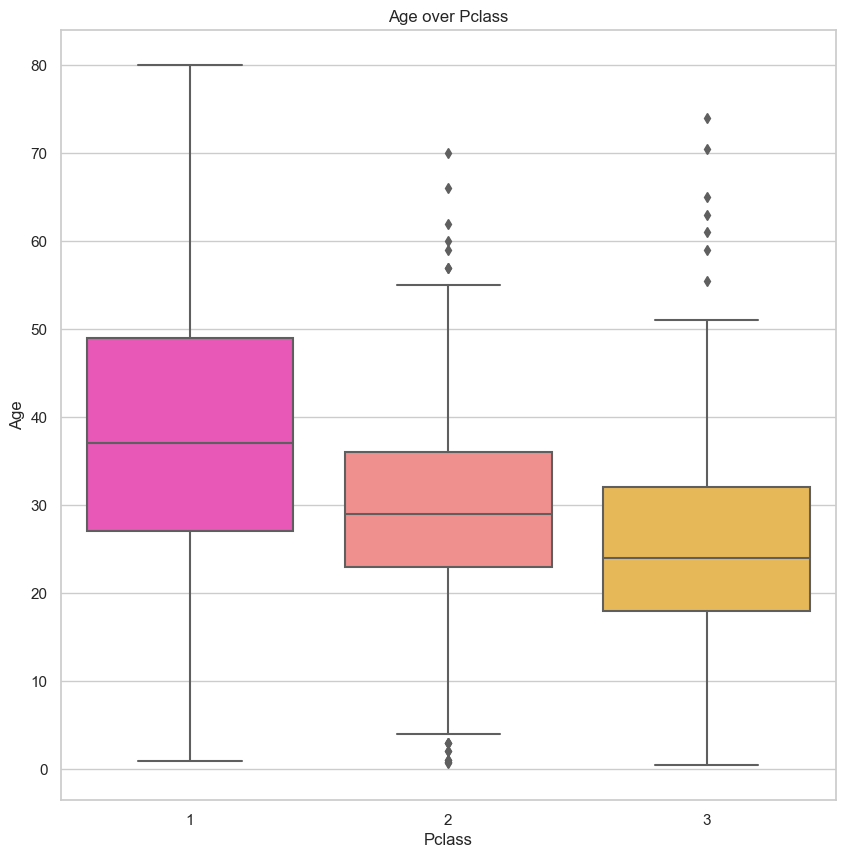

In [33]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Pclass',y='Age',data=train_data,palette="spring")
plt.title('Age over Pclass')

[1. Introduction](#1)

[2. Why Logistic Regression ?](#2)

* [2.1 Sigmoid Function](#2.1)

[3. Importing Libraries](#3)

[4. Importing Training and Test Dataset](#4)

[5. Dataset Column Details](#5)

[6. Explanatory Data Analysis - Training Data](#6)

* [6.1 Number of Rows and Column](#6.1)

* [6.2 Missing Data Analysis](#6.2)

* [6.3 Heat Map](#6.3)

* [6.4 Verifing Unique Values ](#6.4)

* [6.5 Visual Representation of Target based on features](#6.5)

* [6.6 Statistical Analysis of Target based on features](#6.6)

* [ 6.7 Visual Representation of features ](#6.7)

[7. Data Preprocessing](#7)

* [7.1 Handling missing data of age](#7.1)

* [7.2 Handling missing data of Cabin](#7.2)

* [7.3 Handling missing data of Embarked](#7.3)

[8. Encoding Categorical Features](#8)

[9. Analysis Numerical columns](#9)

[10. Train and Test Split](#10)

[11. Feature Scaling](#11)

[12. Logistic Regression Model](#12)

[13. Evaluation](#13)

* [13.1 Confusion Matrix](#13.1)

* [13.2 Accuracy, Precision and Recall](#13.2)

* [13.3 Classification Report](#13.3)

[14. Setting New Threshold](#14)

* [14.1 Confusion Matrix for updated Threshold](#14.1)

* [14.2 Accuracy, Precision and Recall](#14.2)

* [14.3 Classification Report for updated Threshold](#14.3)

[15. Test.csv Analysis](#15)

* [15.1 Missing Value Analysis of Test.csv](#15.1)

* [15.2  Heat Map for missing value of Test.csv](#15.2)

[16. Data Preprocessing for Test.csv](#16)

* [16.1 Handling Missing Data of Age](#16.1)

* [16.2 Handling Missing Data of Cabin](#16.2)

* [16.3 Handling Missing Data of Fare](#16.3)

[17. Dropping Insignificant Features](#17)

[18. Encoding Categorical Features of Test.csv](#18)

[19. Feature Scaling](#19)

[20. Building Logistic Regression](#20)

[21. Conclusion](#21)





<a id="1"></a> <br>
# 1. Intoduction

On April 15, 1912, during the maiden voyage of Titanic, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

Logistic Regression Machine Learning algorithm is modeled, to a predictive the answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).
 

<a id="2"></a> <br>
# 2. Why Logistic Regression ?

For the "Titanic - Machine Learning from Disaster" data set we have to build a model, which would predict the person who traveled is survived or not and the result belongs to two discrete categories. A logistic approach fits best when the task that the machine is learning is to predict two discrete classes like Yes/No, True/False, Sucess/Failure, etc.

Logistic regression is a statistical analysis method used to predict the target variables which belong to discrete categories. It is the most commonly used machine learning algorithm when it comes to binary classification.

It predicts the probability of occurrence of an event using a logistic function also known as the sigmoid function and maps its outcome into two classes 0 or 1.

<a id="2.1"></a> <br>
# 2.1.Sigmoid Function

The sigmoid function, also called logistic function is an ‘S’ shaped curve and it takes any value as input but will have only two values as output, i.e., 0 and 1. It can be represented by equation


  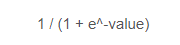

Where e is known as Euler's number and its value is approximately 2.71828.

The S cure of logistic function looks like below

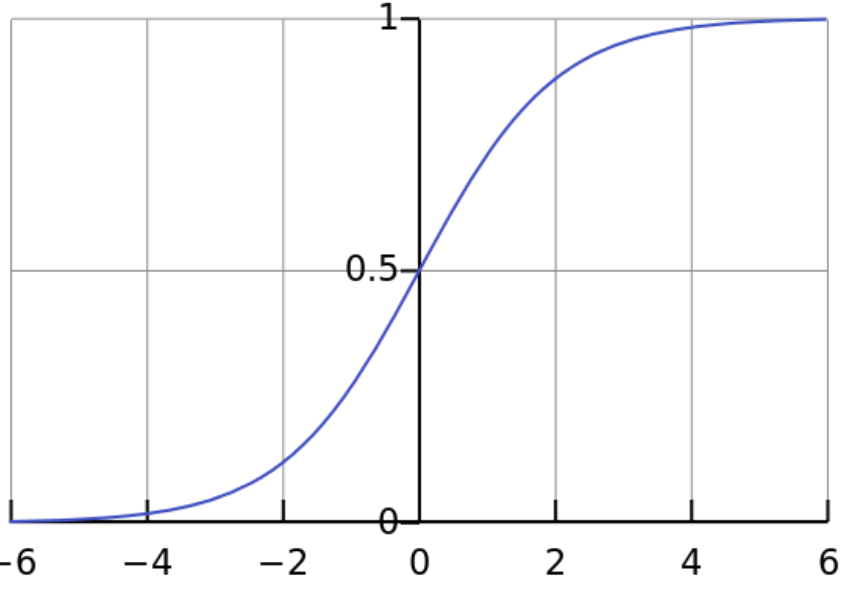


From the curve, it is clear that when X tends to positive or negative infinity, the Y takes 1 and 0 simultaneously. 

The output of the sigmoid function is mapped to 1 or 0 based on threshold value 0.5 (Threshold value is 0.5 by default)

* If value of Probability of occurence of the event > 0.5, sigmoid function output will be 1
* If value of Probability of occurence of the event < 0.5, sigmoid function output will be 0 

<a id="3"></a> <br>
# 3. Importing Libraries

In [34]:
import numpy as np
import pandas as pd
#libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.express as px
%matplotlib inline

# Library for feature Scaling
from sklearn.preprocessing import RobustScaler

#Libraries for logistic Regression Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


#Library for evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

<a id="4"></a> <br>
# 4. Importing Training and Test Dataset

As per [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic) dataset there two seperate csv files for training and test data.

training data set is imported to train_data and test data is imported to test_data

In [35]:
train_data = pd.read_csv("C:\\Users\\hp\\Desktop\\assignments\\Logistic Regression\\Titanic_train.csv")
test_data = pd.read_csv("C:\\Users\hp\\Desktop\\assignments\\Logistic Regression\\Titanic_test.csv")

<a id="5"></a> <br>
# 5. Dataset Column Details

In [36]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [37]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [39]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Dataset details are below :  

* PassengerId - Indicates the passenger number
* Survived - Indicates if the passenger travelled is survived or not. 
* Pclass - Indicates which class passenger belows
* Name - Provides Names details of passenger
* Sex - Indicates sex/gender of passenger
* Age - Indicates age of passenger
* SibSp - Provides information about number of sibiling/spouse accompaning 
* Parch  - Provides information about number of parents / children aboard the Titanic
* Ticket - Ticket number
* Fare - Passenger fare
* Cabin - Provides information about Cabin number, NaN specifies no cabin allocated
* Embarked - Port of Embarkation




<div class="alert alert-block alert-info"> However, we can see there is no Survived column in the test data. Evaluation can only be done when we can compare our predicted target with the actual target.

So to perform evaluation, I will be splitting training data provided into training and test data. Once it is done, the original training data provided will be used to predict test data output.</div>

<a id="6"></a> <br>
# 6. Explanatory Data Analysis - Training Data

<a id="6.1"></a> <br>
### 6.1 Number of Rows and Column

In [40]:
train_data.shape

(891, 12)

No: of rows of training dataset = 891

No:of columns of training dataset = 12

<a id="6.2"></a> <br>
### 6.2 Missing Data Analysis

In [41]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Those column which have  0 against them,  indicates that there are no null values.

Here there are null values are for Age, Cabin and Embarked.

Number of null values for:
* Age - 177
* Cabin - 687
* Embarked - 2       

<a id="6.3"></a> <br>
### 6.3 Heat Map

* Heat Map To check correlation between numerical features

In [42]:
train_data_num_col = train_data.select_dtypes(exclude=['object']).columns
train_data_num = train_data[train_data_num_col]

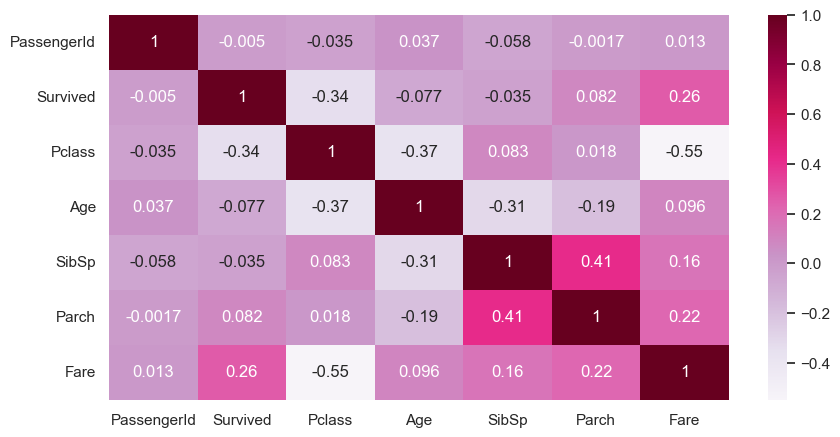

In [43]:
plt.figure(figsize=(10, 5))
sns.heatmap(train_data_num.corr(), annot=True, cmap='PuRd');

In [44]:
correlation = abs(pd.DataFrame(train_data_num.corr().Survived))
correlation

,Survived
PassengerId,0.005007
Survived,1.000000
Pclass,0.338481
Age,0.077221
SibSp,0.035322
Parch,0.081629
Fare,0.257307


* Heat Map To Highlight Missing Value

<Axes: >

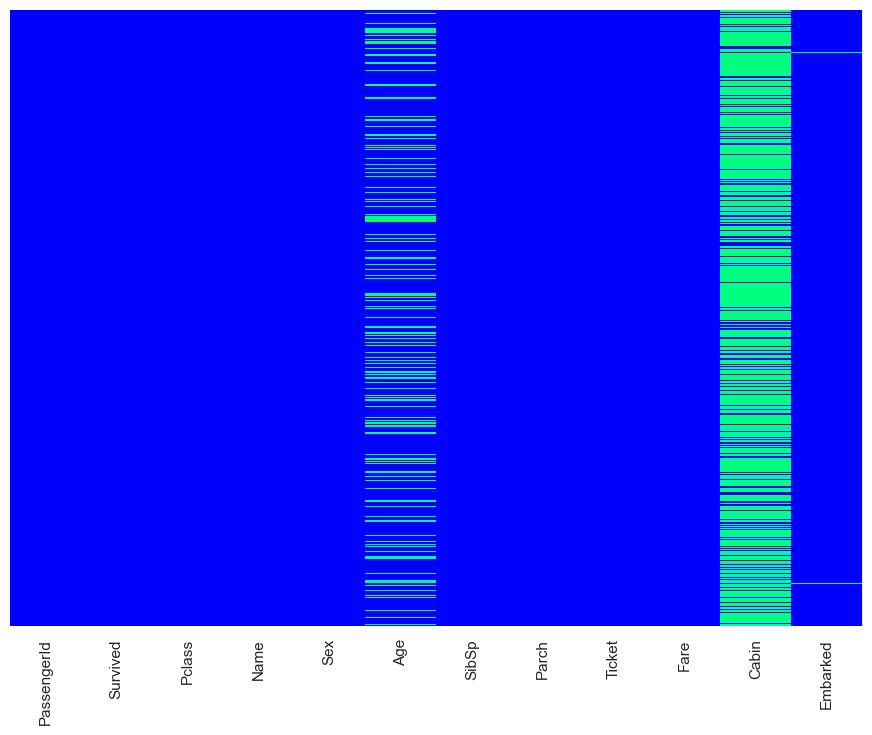

In [45]:
sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap="winter")

The train_data.isnull() will provide a tabular output with boolean False or True. Where False will indicate the value is not missing and True will indicates a missing value. By using seaborn we can create the above heat map where the white line indicates a missing value in the column or we can say it stands for every True value.

From the heat map visualization, it is very evident that only a small proportion of rows have Cabin value. Age is also significantly missing and there are two lines for Embarked.


<a id="6.4"></a> <br>
### 6.4 Verifing Unique Values

As per data dictionary of dataset following column have unique discrete values
1. survival - 0 = No, 1 = Yes
1. pclass - 1 = 1st, 2 = 2nd, 3 = 3rd
1. embarked - C = Cherbourg, Q = Queenstown, S = Southampton

* Verifying unique value of survival

In [46]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

* Verifying unique value of Pclass

In [47]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

* Verifying unique value of Embarked

In [48]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

There is no mismatch in the unique value provided in the dataset. The number aganist each unique value represents number of records belonging to that particular category.

<a id="6.5"></a> <br>
### 6.5 Visual Representation of Target based on features

* Survival Vs Demise

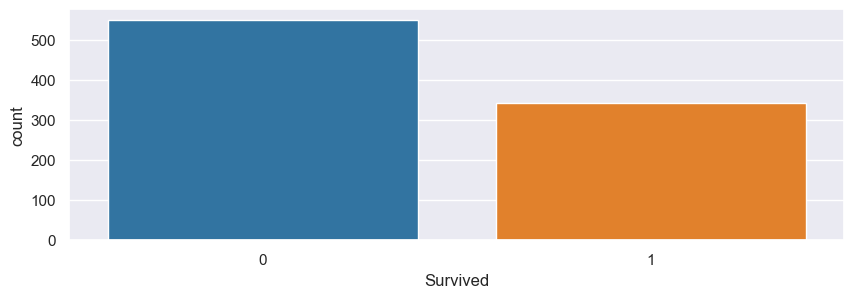

In [49]:
plt.figure(figsize=(10, 3))
sns.countplot(x = "Survived",data=train_data, palette="tab10")
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1645C5;
           font-size:110%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
From the above visual plot of training set, it is clear that number of person survived is less than number of person demise.</p>
</div>

* Survival based on sex

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1000x300 with 0 Axes>

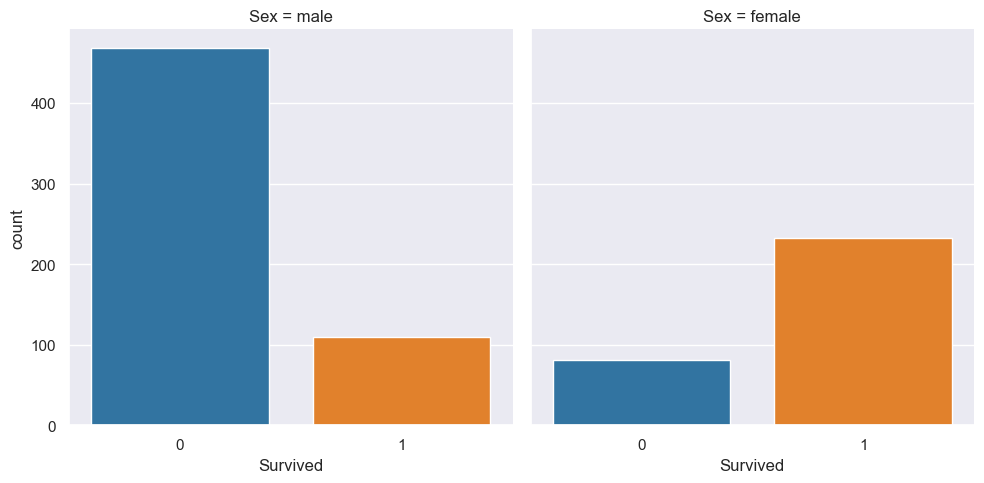

In [50]:
plt.figure(figsize=(10, 3))
sns.catplot(x='Survived', col='Sex', kind='count', data=train_data,palette="tab10");
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#006989;
           font-size:110%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Above visual states, most people who didnot survive are much more likely to be male and people who survived are much likely to be female.</p>
</div>


* Survival based on Pclass - Passenger Class

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1000x300 with 0 Axes>

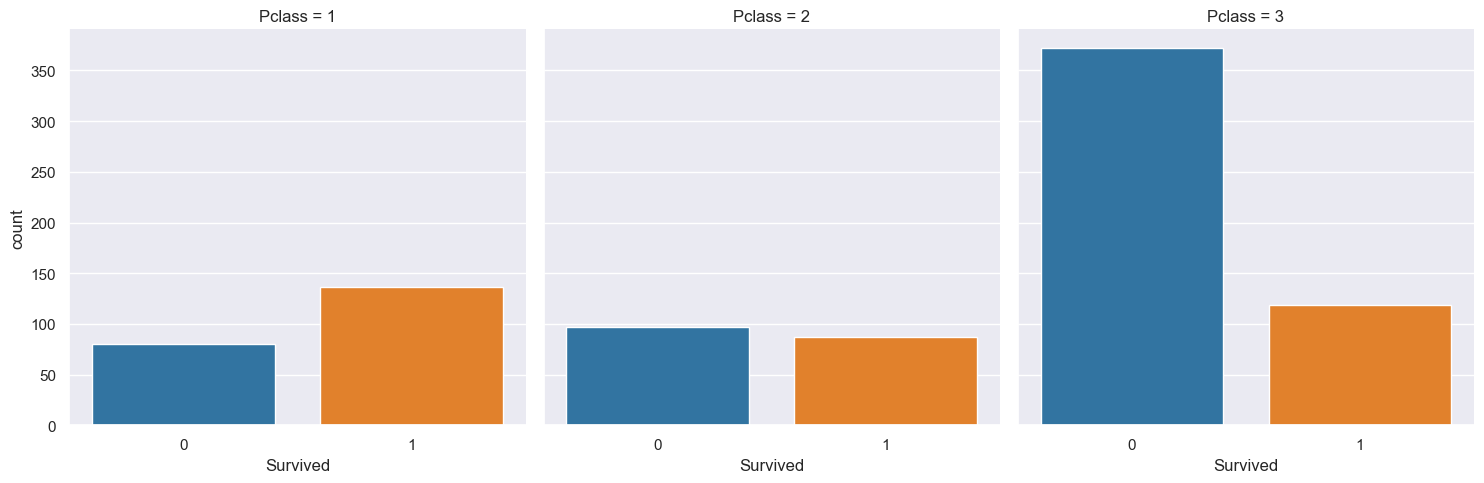

In [51]:
plt.figure(figsize=(10, 3))
sns.catplot(x='Survived', col='Pclass', kind='count', data=train_data,palette="tab10");
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#006989;
           font-size:110%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Above plot indicates. people not survived belong to passenger class 3 or cheapest ticket class.</p>
</div>

* Survival based on Pclass and Sex

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1000x300 with 0 Axes>

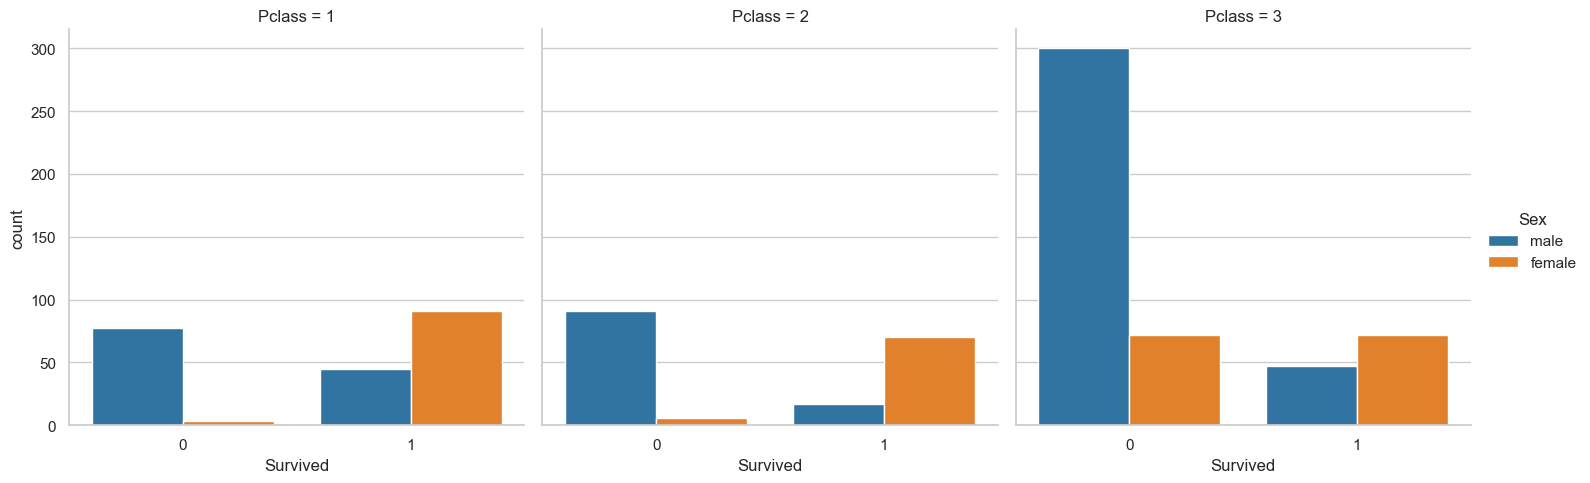

In [52]:
plt.figure(figsize=(10, 3))
sns.set_style('whitegrid')
sns.catplot(x='Survived', col='Pclass', hue = 'Sex', kind='count', data=train_data,palette="tab10");
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#006989;
           font-size:110%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Above plot gives a deeper picture of people not survived. 
    
PClass 3 - The Majority of male and half of female crowd could not make up to survive.
    
PClass 2 and 1 - Almost all who did not survive are male.
    
    </p>
</div>

* Survival based on Embarked 

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1000x300 with 0 Axes>

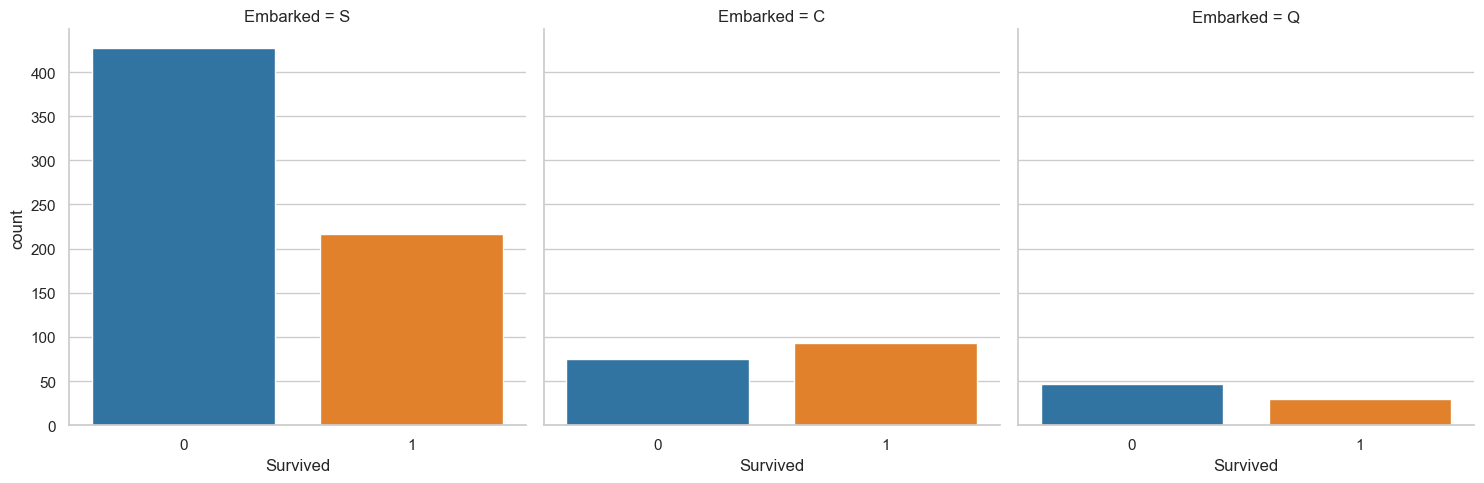

In [53]:
plt.figure(figsize=(10, 3))
sns.set_style('whitegrid')
sns.catplot(x='Survived', col='Embarked', kind='count', data=train_data,palette="tab10");
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#006989;
           font-size:110%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Majority of people boarded from Southampton port could not survive. Already we have seen people in 3rd Class could not survive. So we have check relation between Pclass and Embarked

    </p>
</div>

* Survival based on Embarked and Pclass

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1000x300 with 0 Axes>

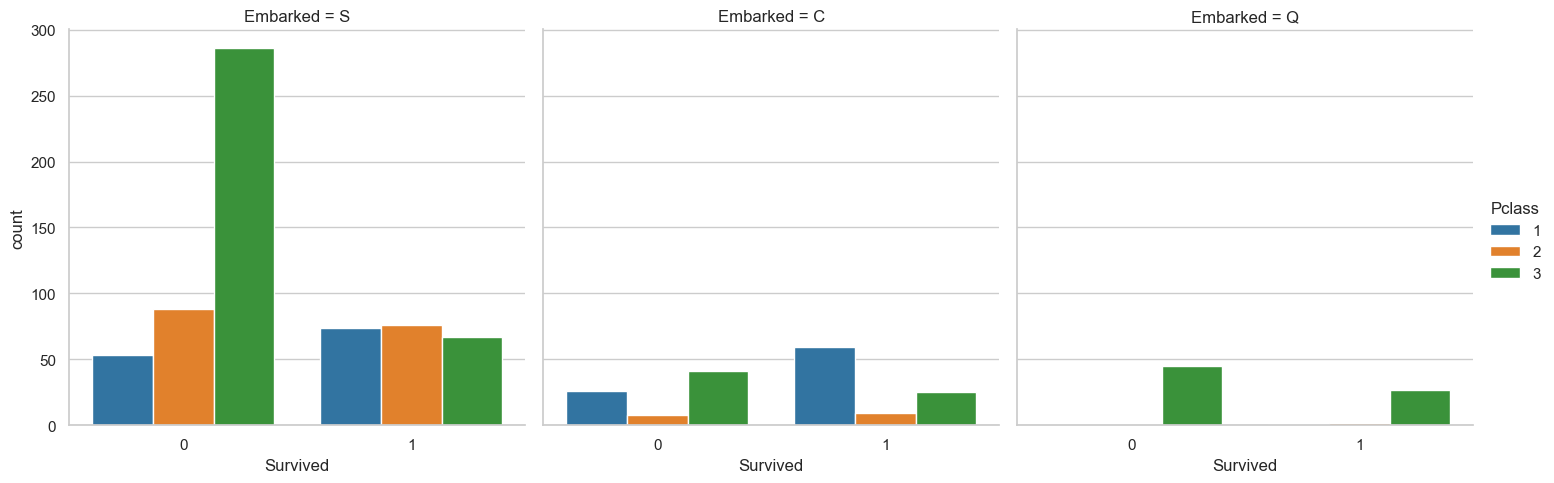

In [54]:
plt.figure(figsize=(10, 3))
sns.set_style('whitegrid')
sns.catplot(x='Survived', col='Embarked', hue = 'Pclass', kind='count', data=train_data,palette="tab10");
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#006989;
           font-size:110%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Embarked S - Majority of people died belong to PClass  3.
Embarked C - Here Pclass 2 has less death compared to other 2 class, still Pclass 3 has majority of death. But when compared to Embarked C infact it is much much less.
Embarked Q - Here Pclass 3 only have death rate.

    </p>
</div>

* Survival based on Fare

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



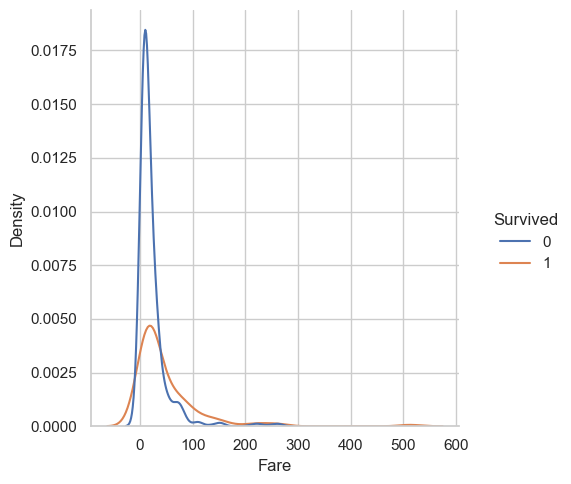

In [55]:
sns.displot(data=train_data, x="Fare",hue='Survived',kind ='kde')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#006989;
           font-size:110%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
The Maximum of people who could not survive were those who bought the ticket with low fare.
    </p>
</div>

<a id="6.6"></a> <br>
### 6.6 Statistical Analysis of Target based on features

* Survival based on Sex

In [56]:
pd.crosstab(train_data.Sex,train_data.Survived,normalize = "index" ).style.background_gradient(cmap='Set3')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#006989;
           font-size:110%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Out of total females traveled 74.2% of them could survive but  only 18.9% of total male traveled could survive.

    </p>
</div>

* Survival based on Pclass

In [57]:
pd.crosstab(train_data.Pclass,train_data.Survived,normalize = "index" ).style.background_gradient(cmap='Set2')

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#006989;
           font-size:110%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Statistical analysis of survival based on Pclass shows, 62.96% of PClass 1 could survive, and 47.28% of Pclass2 could survive and 24.24% of PClass3 could survive. 

    </p>
</div>

* Survival based on Embarked

In [58]:
pd.crosstab(train_data.Embarked,train_data.Survived,normalize = "index" ).style.background_gradient(cmap='Set1')

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#006989;
           font-size:110%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Statistical analysis of survival based on Embarked shows, 55.36% of Embarked C could survive, and 38.96% of Embarked Q could survive and 33.7% of Embarked s could survive. 

    </p>
</div>

<a id="6.7"></a> <br>
### 6.7 Visual Representation of features 

* Visual representation of age

<Axes: xlabel='Age', ylabel='Count'>

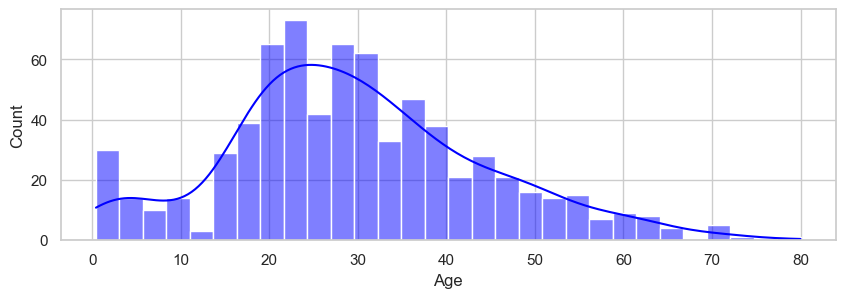

In [59]:
plt.figure(figsize=(10, 3))
sns.histplot(train_data['Age'].dropna(),kde=True,color='blue',bins=30)

Age distribution visualisation, clearly shows skew towards younger passengers. 

If more details of age group is to be seen, we can use cufflinks.

In [60]:
cf.go_offline()
train_data['Age'].iplot(kind='hist',bins=35)

From cufflinks visualisation, it is much more clear about passenger age distribution. The passgeners are more likely to belong to age group grom 18-33 and there are quite few infant passengers from 0-2. cufflinks visualisation allows to create an interactive plot, like can magnify, zoom in zoom out and much more options. 

* Visualisation of SibSp (Siblings/Spouses )

<Axes: xlabel='SibSp', ylabel='count'>

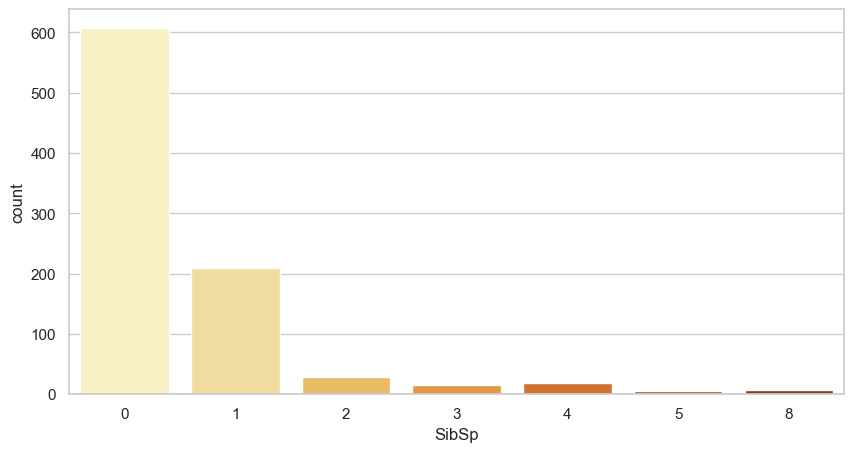

In [61]:
plt.figure(figsize=(10, 5))
sns.countplot(x='SibSp',data=train_data, palette='YlOrBr')

The above visualisation clearly states most of the people travelled didnot have sibling or spouse

* Visualisation of Parch  feature

<Axes: xlabel='Parch', ylabel='count'>

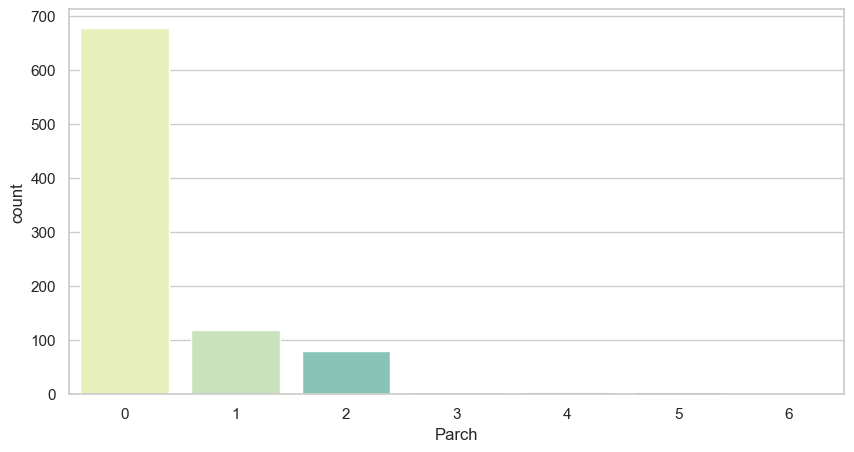

In [62]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Parch',data=train_data,palette='YlGnBu')

The above visualisation clearly states most of the people travelled didnot have children accompanying them

* Joint plot of SibSp and Parch

As Visual representation of SibSp and Parch shows there majority where single passengers, so we can use a joint map to check the distribution.

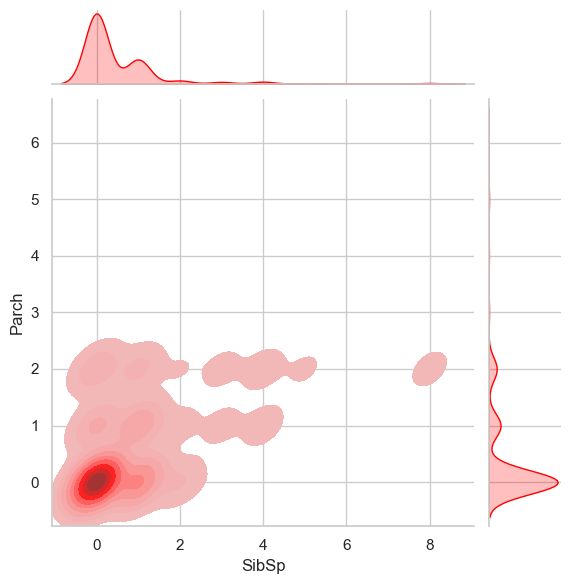

In [63]:
sns.jointplot(x='SibSp',y='Parch',data=train_data,color='red',kind='kde', fill =True);

* 3D Visualisation of a person with features Name,Sex and Age

In [64]:
plt.figure(figsize=(10, 3))
fig = px.scatter_3d(train_data, x='Name', y='Sex', z='Age', color='Age')
fig.show()

<Figure size 1000x300 with 0 Axes>

Each point, represents a person and it shows name, sex and age. Color indicator is Age.

<a id="7"></a> <br>
# 7.Data Preprocessing

As we already know we have missing data for Age, Cabin and Embarked.

Number of missing data for:
* Age - 177
* Cabin - 687
* Embarked - 2     

<a id="7.1"></a> <br>
### 7.1  Handling missing data of Age

In [65]:
train_data['Age'].isnull().sum()

177

There are  177 null values in age column.

We can use imputing function to fill missing age data, by finding dependency of age over the Pclass variable, as we have already seen 3rd class survival rate is very less. For this first we can visualise this distribution using a boxplot with age and Pclass. 

Boxplot, box indicates the interquartile Range(IQR) with median as central line.  Maximum value that is the line end at top is equal to  Q3+1.5* IQR and minimum line at bottom is equal to Q1-1.5* IQR. If there is any circle outside the extreme lines, it indicates there is outlier in the data.

Text(0.5, 1.0, 'Age over Pclass')

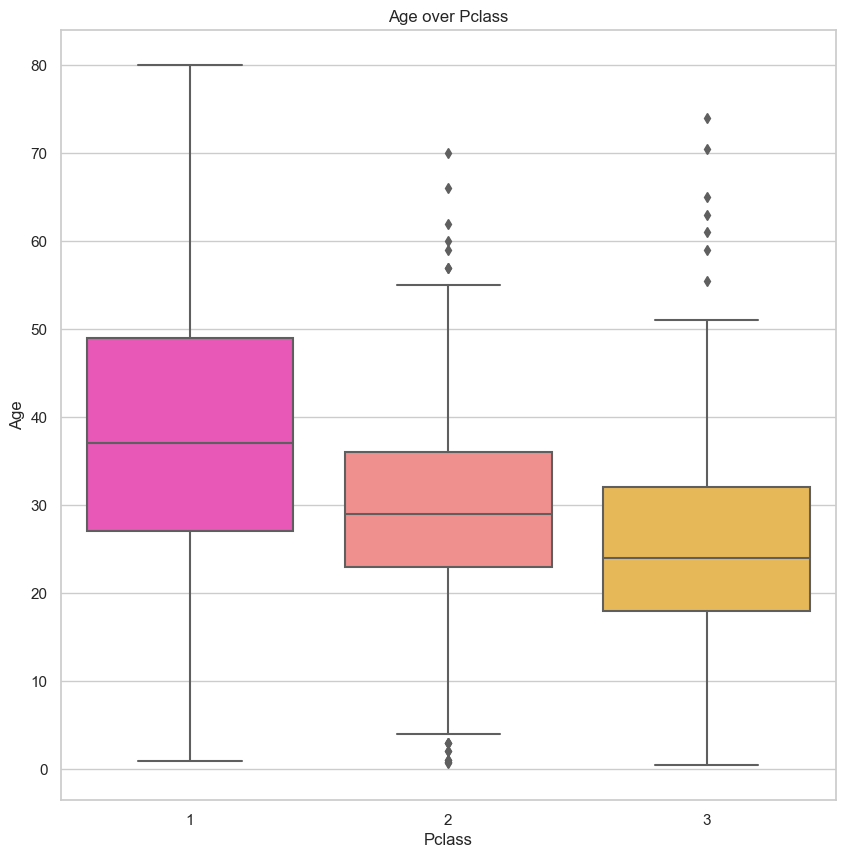

In [66]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Pclass',y='Age',data=train_data,palette="spring")
plt.title('Age over Pclass')


From the boxplot it is very clear that older people are in Pclass 1 and so on. So to impute age, we can use below code.
Also the median of Pclass1 = 37, Pclass2 = 29 and PClass3 = 24.

First we can write an if-else struture to define impute_train_age(), which will return age, whose value will be median of that particular Pclass.

In [67]:
def impute_train_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

As we have defined function impute_train_age() with cols as a tuple, when we call the function it will return the age as per the PClass value.

So next we can replace the null value of Age column using function impute_train_age().

In [68]:
train_data['Age'] = train_data[['Age','Pclass']].apply(impute_train_age,axis=1)

Now, if we run below code, it will give number null values as zero.

In [69]:
train_data['Age'].isnull().sum()

0

<a id="7.2"></a> <br>
### 7.2  Handling missing data of Cabin

In [70]:
train_data['Cabin'].isnull().sum()

687

From 891 rows, for 687 rows Cabin have null value, moreover, cabins are represented as C85, C123 etc.

So we can drop this column.

In [71]:
train_data.drop('Cabin',axis=1,inplace=True)

In [72]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


We can see Cabin column is removed.

<a id="7.2"></a> <br>
### 7.2  Handling missing data of Embarked

In [73]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Only two rows of Embarked is missing, so we can drop those two rows.

In [74]:
train_data.dropna(inplace=True)

In [75]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now there is no more missing data.

<a id="8"></a> <br>
# 8  Encoding Categorical Features

In [76]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


From train_data.info(), it is clear that we have 4 categorical variables in our dataset. They are Name, Sex, Ticket and Embarked.

Features Name and Ticket will have no significant meaning for determining target, so we can drop those two. Where as Sex and Embarked feautres will have to be encoded before builiding model.

In [77]:
train_data.drop(['Name','Ticket'],axis=1,inplace=True)

In [78]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


Now only Columns Sex and Embarked contain categorical variables, they should be encoded before building the model. 

For enoding categorical data, dummy variable is to be created for each discrete categorical variable in each column ( here for columns Sex and Embarked ) which can be done by using pandas.get_dummies() which will return dummy-coded data.

Here column Sex contains two variables male and female and Embarked contains 3 cities, C = Cherbourg, Q = Queenstown, S = Southampton.

For Embarked column, a dummy variable is to be assigned to each city. If our data does not belong to C and Q, it clearly means it will belong to S. This is called multicolinearity or dummy variable trap. That is by using one feature(s) we can predict another feature. To avoid this we will have to drop one dummy variable.

Likewise for column Sex, for males and females, we will assign a dummy variable and we will have to drop one dummy variable from it. Because if the column is not male it indicates it will be female.

Thus we can say if we drop one dummy variable no relevant information will be lost as other dummy variables can explain dropped feature fully. So if there are n dummy variables, n-1 dummy variables will be able to predict the value of the n-th dummy variable.

In pandas.get_dummies(), by using parameter drop_first = True, it will drop first dummy variable, thus it will give n-1 dummies out of n categorical levels by removing the first level.

#  Encoding Techniques:

#### LabelEncoding:

let's apply label Encoding function For categorical Features: 

In [79]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_data["Embarked"]=le.fit_transform(train_data["Embarked"])
train_data["Sex"]=le.fit_transform(train_data["Sex"])
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2




Now train_data.head() will have new columns replaced by columnname_discrete values.

In [80]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


Categorical encoded column name is created in alphabetic order and is placed at end of the columns of dataset. So the dropped column will be first alphabet of that column of that category.

Here column Sex is replaced by Sex_male and Sex_female is dropped.
Also Embarked is replaced by Embarked_Q and Embarked_S and Embarked_C is dropped.

Now all the column have numberical data.


<a id="9"></a> <br>
# 9. Analysis Numerical columns

As PassengerId is like index, it does have any significance for building model and also it will loose its meaning as index when we do feature scaling. So it can dropped.

In [81]:
train_data.drop('PassengerId',axis=1,inplace=True)

In [82]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


<a id="10"></a> <br>
# 10. Train and Test Split

As discussed earlier, for test.csv there is no survivial data. So for test and train split, I will be using train_data as we cannot perform evaluation if we donot have target in our evaluation dataset. 

Once evaluation part is done, we can predict target (Survived or not) of test_data.csv

In [83]:
X = train_data.drop(['Survived'],axis = 1)
y = train_data['Survived']

In [84]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [85]:
y.value_counts()

0    549
1    340
Name: Survived, dtype: int64

Handling imbalance data using SMOTE based techniques

Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this i) Undersampling ii) Oversampling. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information. In this article, I am specifically covering some special data augmentation oversampling techniques: SMOTE and its related counterparts.

SMOTE: Synthetic Minority Oversampling Technique
SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.

Working Procedure: At first the total no. of oversampling observations, N is set up. Generally, it is selected such that the binary class distribution is 1:1. But that could be tuned down based on need. Then the iteration starts by first selecting a positive class instance at random. Next, the KNN’s (by default 5) for that instance is obtained. At last, N of these K instances is chosen to interpolate new synthetic instances. To do that, using any distance metric the difference in distance between the feature vector and its neighbors is calculated. Now, this difference is multiplied by any random value in (0,1] and is added to the previous feature vector. This is pictorially represented below: 
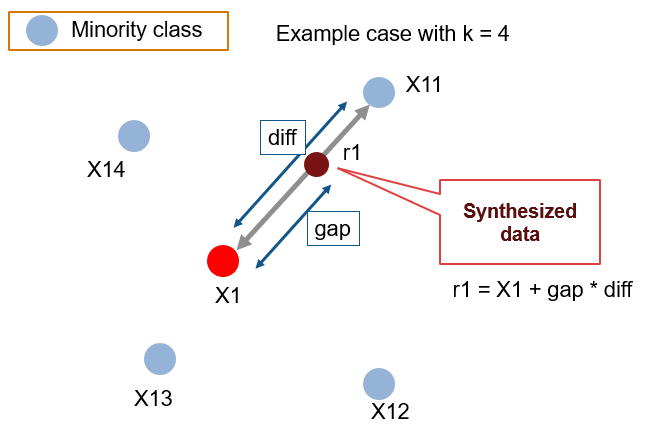

Though this algorithm is quite useful, it has few drawbacks associated with it.

i) The synthetic instances generated are in the same direction i.e. connected by an artificial line its diagonal instances. This in turn complicates the decision surface generated by few classifier algorithms.

ii) SMOTE tends to create a large no. of noisy data points in feature space

In [86]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42, 
                   sampling_strategy={0:549, 1:549, })
X_smt, y_smt = smt.fit_resample(X, y)

### lets splite train data in train and test

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size=0.2,random_state=101)

<a id="11"></a> <br>
### lets go to the model building :
`xgboost` using for model building

In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(n_estimators = 42)

# Train the classifier
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred = xgb_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.8272727272727273
Confusion Matrix:
[[98 17]
 [21 84]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       115
           1       0.83      0.80      0.82       105

    accuracy                           0.83       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.83      0.83      0.83       220



<a id="12"></a> <br>
now lets try data transformation by using `StandardScaler`

In [89]:
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

model fitting with scaled data

In [90]:
# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(n_estimators = 42, eval_metric='mlogloss')

# Train the classifier
xgb_clf.fit(X_train_sc, y_train)

# Make predictions
y_pred = xgb_clf.predict(X_test_sc)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.8272727272727273
Confusion Matrix:
[[98 17]
 [21 84]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       115
           1       0.83      0.80      0.82       105

    accuracy                           0.83       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.83      0.83      0.83       220



as we see there is no improment in Accuracy score 

<a id="13"></a> <br>
let's find best parameters grid for this model by using `GridSearchCV`

In [91]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0]
}
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}


In [92]:
best_params_xgb = {'learning_rate': [0.01], 'max_depth': [7], 'n_estimators': [100], 'subsample': [1.0]}

In [93]:
# Train the classifier with the best parameters
best_xgb_clf = xgb.XGBClassifier(**best_params, eval_metric='mlogloss')
best_xgb_clf.fit(X_train, y_train)

# Make predictions with the tuned model
y_pred_best = best_xgb_clf.predict(X_test)

# Evaluate the tuned model
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

print(f'Accuracy with best parameters: {accuracy_best}')
print('Confusion Matrix:')
print(conf_matrix_best)
print('Classification Report:')
print(class_report_best)

Accuracy with best parameters: 0.85
Confusion Matrix:
[[104  11]
 [ 22  83]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       115
           1       0.88      0.79      0.83       105

    accuracy                           0.85       220
   macro avg       0.85      0.85      0.85       220
weighted avg       0.85      0.85      0.85       220



as we see there is good improment in accurecy score 0.85

lets check the importent features by using `plot_importance`

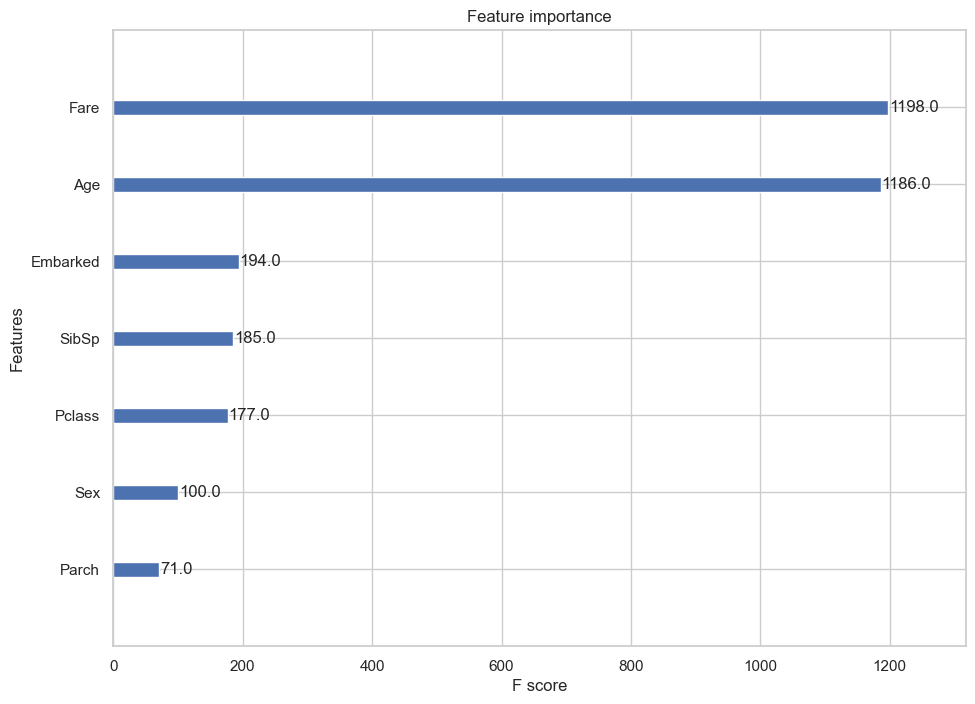

In [94]:
# Plot feature importance
xgb.plot_importance(best_xgb_clf)
plt.show()

<a id="14"></a> <br>
Now lets move forward to the `lightgbm` to build a model

In [96]:
import lightgbm as lgb

# Create the LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Define parameters
params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the model with early stopping
bst = lgb.train(
    params,
    train_data,
    num_boost_round=100,
    valid_sets=[test_data],
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)

[LightGBM] [Info] Number of positive: 444, number of negative: 434
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 360
[LightGBM] [Info] Number of data points in the train set: 878, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505695 -> initscore=0.022780
[LightGBM] [Info] Start training from score 0.022780
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[18]	valid_0's binary_error: 0.145455


In [97]:
# Make predictions
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8545454545454545
Confusion Matrix:
[[103  12]
 [ 20  85]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       115
           1       0.88      0.81      0.84       105

    accuracy                           0.85       220
   macro avg       0.86      0.85      0.85       220
weighted avg       0.86      0.85      0.85       220



in this model i got very good accuracy score in this model 

lets try to find best parameters for fit a good accuracy model by using `RandomizedSearchCV`

In [98]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb

# Define the parameter grid
param_dist = {
        'num_leaves': [31],
        'n_estimators': [200], 
        'min_data_in_leaf': [20], 
        'max_depth': [10], 
        'learning_rate': [0.05], 
        'lambda_l2': [0.1], 
        'lambda_l1': [0.5], 
        'feature_fraction': [0.8]
        
}

# Initialize the LightGBM classifier
lgb_clf = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', metric='binary_error')

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=lgb_clf, param_distributions=param_dist, n_iter=50, cv=3, scoring='accuracy', verbose=1, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV to find the best parameters
random_search.fit(X_train, y_train)

# Get the best parameters from RandomizedSearchCV
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

Fitting 3 folds for each of 1 candidates, totalling 3 fits


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning:

The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.



[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Info] Number of positive: 444, number of negative: 434
[LightGBM] [Info] Auto-choo

Best parameters: {'num_leaves': 31, 'n_estimators': 200, 'min_data_in_leaf': 20, 'max_depth': 10, 'learning_rate': 0.05, 'lambda_l2': 0.1, 'lambda_l1': 0.5, 'feature_fraction': 0.8}


In [99]:
best_params4 = {'num_leaves': 31, 'n_estimators': 200, 'min_data_in_leaf': 20, 'max_depth': 10, 'learning_rate': 0.05, 'lambda_l2': 0.1, 'lambda_l1': 0.5, 'feature_fraction': 0.8}

lets fit model by using this parameters 

In [100]:
# Train the classifier with the best parameters
best_lgb_clf = lgb.LGBMClassifier(**best_params)
best_lgb_clf.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_best = best_lgb_clf.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

print(f'Accuracy with best parameters: {accuracy_best}')
print('Confusion Matrix:')
print(conf_matrix_best)
print('Classification Report:')
print(class_report_best)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Info] Number of positive: 444, number of negative: 434
[LightGBM] [Info] Auto-choo

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
Accuracy with best parameters: 0.8545454545454545
Confusion Matrix:
[[101  14]
 [ 18  87]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       115
           1       0.86      0.83      0.84       105

    accuracy                           0.85       220
   macro avg       0.86      0.85      0.85       220
weighted avg       0.85      0.85      0.85       220



In [101]:
Test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Now i have much good model with accuracy 85% and impressive Confusion Matrix values:
[[101  14]
 [ 18  87]]

In [102]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


<a id="15"></a> <br>
# 15. Test.csv Analysis

<a id="15.1"></a> <br>
# 15.1 Missing Value Analysis of Test.csv

In [103]:
Test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<a id="15.2"></a> <br>
# 15.2 Heat Map for missing value of Test.csv

<Axes: >

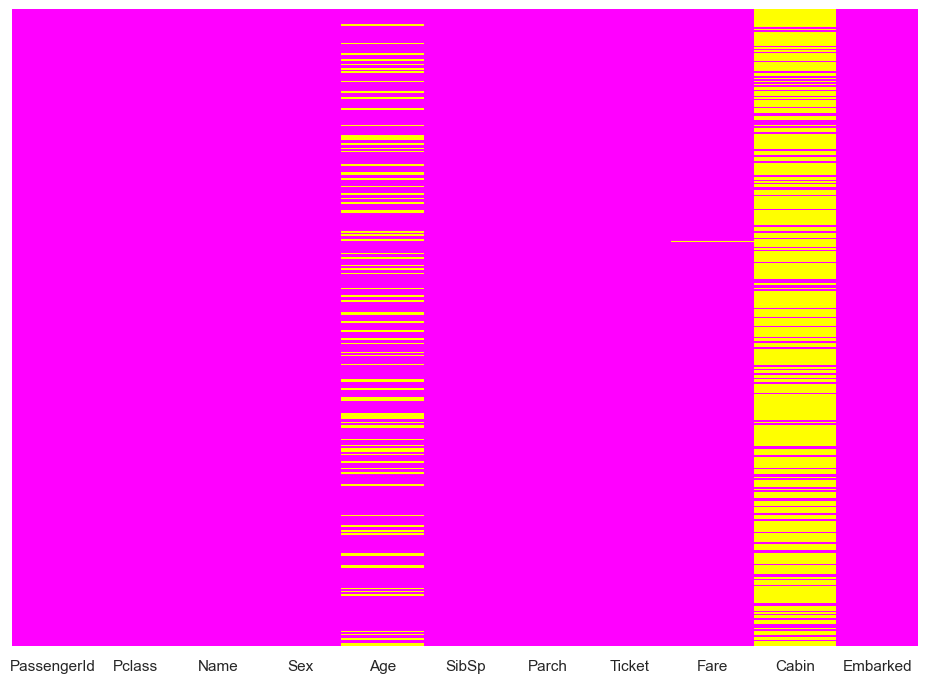

In [104]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(Test_data.isnull(),yticklabels=False,cbar=False,cmap="spring")

From Test data out of 418 rows, we have 86 values missing for age, 327 for cabin and 1 for Fare.

Age will have to fill the null values using median. This can be done in the similar way that is done to training dataset.
As Cabin is having majority of data missing as well as we dropped it in train_data, so we can drop Cabin column for test data also. As there is only 1 value missing for Fare, we can provide mean of fare value to it.

<a id="16"></a> <br>
# 16. Data Preprocessing for Test.csv 

<a id="16.1"></a> <br>
# 16.1 Handling Missing Data of Age

Text(0.5, 1.0, 'Age over Pclass')

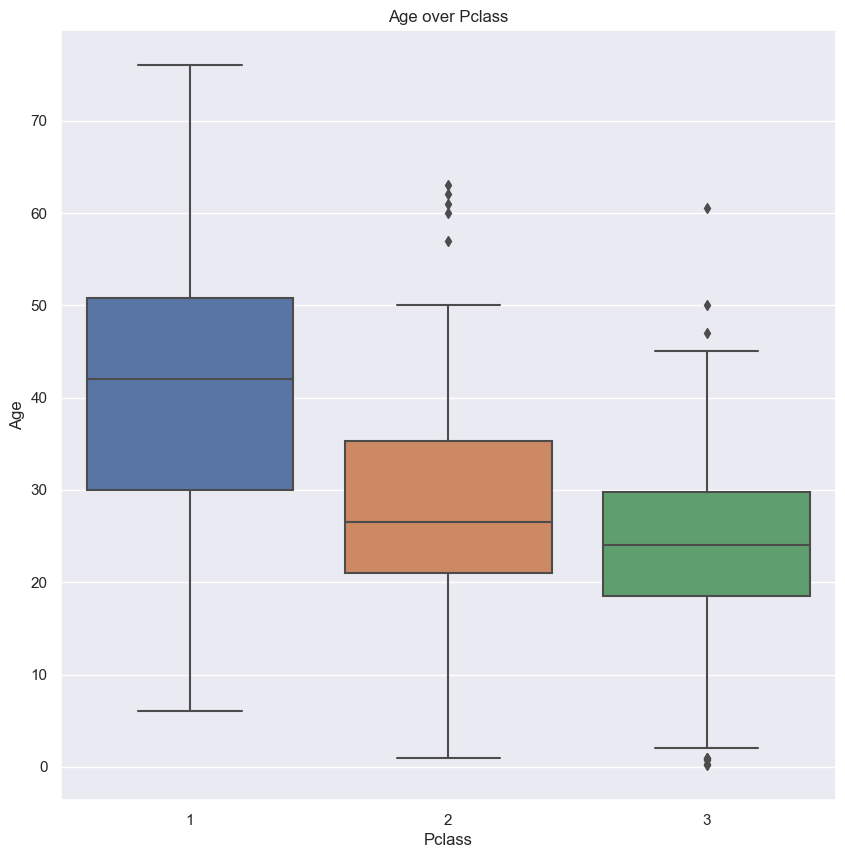

In [105]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Pclass',y='Age',data=Test_data,palette=None)
plt.title('Age over Pclass')

As we have created impute_train_age() for handling missing data of test_data, we can define and call new function impute_test_age() to handle missing data of test data.

In [106]:
def impute_test_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 42

        elif Pclass == 2:
            return 27

        else:
            return 25

    else:
        return Age

In [107]:
Test_data['Age'] = Test_data[['Age','Pclass']].apply(impute_test_age,axis=1)

In [108]:
Test_data['Age'].isnull().sum()

0

<a id="16.2"></a> <br>
# 16.2 Handling Missing Data of Cabin

In [109]:
Test_data.drop('Cabin',axis=1,inplace=True)

In [110]:
Test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

Now only Fare is having missing value.

<a id="16.3"></a> <br>
# 16.3 Handling Missing Data of Fare

In [111]:
null_columns=Test_data.columns[Test_data.isnull().any()]
row_num = (Test_data[Test_data["Fare"].isnull()][null_columns])
row_num

,Fare
152,NaN


In [112]:
Test_data.iloc[152, :]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                          NaN
Embarked                        S
Name: 152, dtype: object

Missing value of Fare belong to a male passenger whose PassengerId 1044 from Pclass 3 and age is 60.5

<Axes: xlabel='Fare', ylabel='Count'>

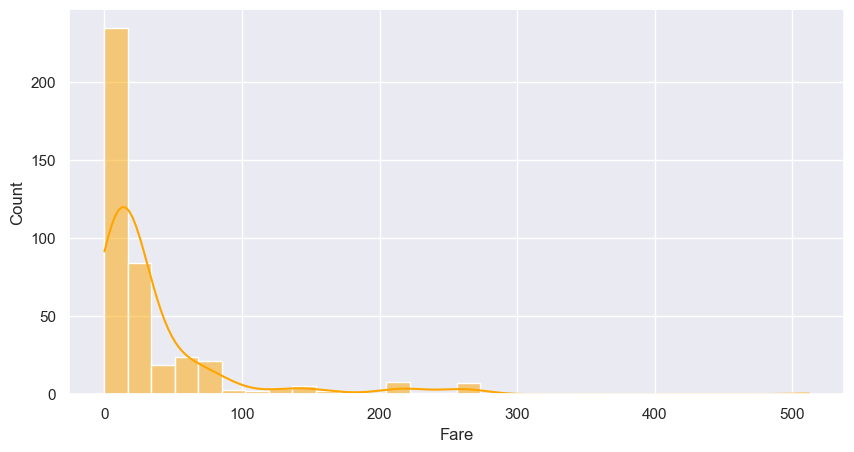

In [113]:
plt.figure(figsize=(10, 5))
sns.histplot(Test_data['Fare'].dropna(),kde=True,color='orange',bins=30)

From the plot it is clear, Fare is skewed toward lower value, so we can go for median.

In [114]:
Fare_median = Test_data["Fare"].median()
Fare_median

14.4542

In [115]:
Test_data = Test_data.replace(np.NaN,14.4542)

In [116]:
Test_data.iloc[152, :]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                      14.4542
Embarked                        S
Name: 152, dtype: object

Fare Value for PassengerId 1044 is replaced by 14.4542

In [117]:
Test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<a id="17"></a> <br>
# 17. Dropping Insignificant Features

As we know Name, Ticket and PassengerId columns are not having any significance for target prediction. So we can drop those features.

In [118]:
Test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


As Ticket and Name does have any significant impact on Target, we have dropped it from train_data, so we will drop same from test_data also.

In [119]:
#Saving PassengerID for submission
test_pass = Test_data['PassengerId']
test_pass

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [120]:
Test_data.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)

In [121]:
Test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


<a id="18"></a> <br>
Test data transformation:
now have to encoding the object data type features by using lablencoding

In [122]:
Test_data["Embarked"]=le.fit_transform(Test_data["Embarked"])
Test_data["Sex"]=le.fit_transform(Test_data["Sex"])
Test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [125]:
X1 = Test_data
X1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,25.0,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,25.0,0,0,8.0500,2


<a id="19"></a> <br>
lets fit the model to the test data and predict the target values

In [126]:
y1_pred_best = best_lgb_clf.predict(X1)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1


In [127]:
y1_pred_best

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,